In [ ]:
import cvxpy as cp
import numpy as np
from scipy.linalg import toeplitz, circulant
import matplotlib.pyplot as plt

In [ ]:
def R(D, n, d):
    n_y, n_x  = D.shape
    R = np.zeros((n,n))
    for k in range(0,n):
      for l in range(k,n):
          I = np.zeros((n_x,n_x))
          I_s = np.zeros((n,n))
          I[l*d:(l+1)*d, k*d:(k+1)*d] = np.ones(d)
          I_s[l,k] = 1 
          if k==l:
            R = R+cp.norm(cp.multiply(I,D), 2)*I_s
          else:
            R = R+cp.norm(cp.multiply(I,D), 2)*I_s+cp.norm(cp.multiply(I.T,D), 2)*I_s.T
        
    return R

# Test for a random Matrix D

In [ ]:
d = 2 # number of block length
m = 5 
n = 10 # number of blocks

# creating a random matrix with orthonormal blocks
D = np.zeros((m*d, n*d))
for l in range(0,n):
    D[:,l*d:(l+1)*d] = np.random.random(size=(m*d, d))
    D[:,l*d:(l+1)*d], _ = np.linalg.qr(D[:,l*d:(l+1)*d])


In [ ]:

# Construct the problem.
B_cvx = cp.Variable((m*d,n*d))

I = np.kron(np.eye(n), np.ones((d, d)))
k = np.tile(np.eye(d), (1, n)).T
b = cp.multiply(B_cvx.T@D, I)
b = cp.matmul(b, k) #extracting the diagonal blocks of D^TB
constraints = [b == k]

objective = cp.Minimize(1/d*cp.max(R(B_cvx.T@D-np.eye(n*d), n, d)))

#objective = cp.Minimize(cp.max(cp.abs(A.T@x-np.eye(n))))

prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
#print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
#print(constraints[0].dual_value)
print(result)

0.46081424546188576


first block of $B^TD$

In [ ]:
# Construct the problem.
B_up = cp.Variable((m*d,n*d))

I = np.kron(np.eye(n), np.ones((d, d)))
k = np.tile(np.eye(d), (1, n)).T
b = cp.multiply(B_up.T@D, I)
b = cp.matmul(b, k) #extracting the diagonal blocks of D^TB
constraints = [b == k]

objective = cp.Minimize(1/d*(cp.norm(B_up.T@D, 'fro')))

#objective = cp.Minimize(cp.max(cp.abs(A.T@x-np.eye(n))))

prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
#print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
#print(constraints[0].dual_value)
print(result)

3.6164415773707432


# Comparison of "direct" solution and frobenius estimation

generalized coherence:

In [ ]:
1/d*np.max(R(B_up.T@D-np.eye(n*d), n, d).value)

0.5662568328312224

In [ ]:
1/d*np.max(R(B_cvx.T@D-np.eye(n*d), n, d).value)

0.4608047108265468

images

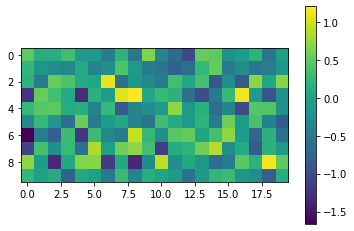

In [ ]:
plt.imshow(B_up.value)
plt.colorbar()

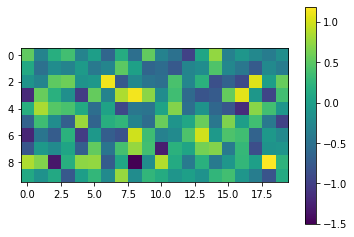

In [ ]:
plt.imshow(B_cvx.value)
plt.colorbar()

condition number, with respect to the $\|\cdot\|_2$ operator norm.

In [ ]:
np.linalg.cond(B_up.value)

4.95279241640092

In [ ]:
np.linalg.cond(B_cvx.value)

5.417888775286857

We observe $ \mu_b(B_{cvx}) < \mu_b(B_{up}) $ but on the other hand $ \kappa(B_{cvx}) > \kappa(B_{up}) $
